## What languages will last forever?

## 1 - Business Understanding.

### Understanding the on demand languages helps not only  business (ex. education) but also individuals who want to develop their carreer. 

###  In order to understand the most required and / or desired programming languages, we will answer the following main questions:

### I - What are the most popular programming languages in each year?

### II - Languages of the future: which are the programming languages that people most desire to learn?

### III - The more languages you know the higher your salary?



### The present analysis is based on [Stack Overflow Survey - Multiple Years results](https://insights.stackoverflow.com/survey).

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
print('Libraries imported!')

Libraries imported!


#### i) Reading the files using pandas:

In [2]:
#Dataframes 2011 - 2021
res_2011 = pd.read_csv('stackoverflow_results_2011.csv', encoding = "ISO-8859-1", low_memory=False)
res_2012 = pd.read_csv('stackoverflow_results_2012.csv', encoding = "ISO-8859-1", low_memory=False)
res_2013 = pd.read_csv('stackoverflow_results_2013.csv', encoding = "ISO-8859-1", low_memory=False)
res_2014 = pd.read_csv('stackoverflow_results_2014.csv', low_memory=False)
res_2015 = pd.read_csv('stackoverflow_results_2015.csv', low_memory=False)
df_2016 = pd.read_csv('stackoverflow_results_2016.csv', low_memory=False)
df_2017 = pd.read_csv('stackoverflow_results_2017.csv',low_memory=False)
df_2018 = pd.read_csv('stackoverflow_results_2018.csv', low_memory=False)
df_2019 = pd.read_csv('stackoverflow_results_2019.csv', low_memory=False)
df_2020 = pd.read_csv('stackoverflow_results_2020.csv', low_memory=False)
df_2021 = pd.read_csv('survey_results_public.csv', low_memory=False)

In [3]:
# Survey schemas
schema_2017 = pd.read_csv ('schema_2017.csv')
schema_2018 = pd.read_csv ('schema_2018.csv')
schema_2019 = pd.read_csv ('schema_2019.csv')
schema_2020 = pd.read_csv ('schema_2020.csv')
schema_2021 = pd.read_csv ('survey_results_schema.csv')

#### ii) Clean columns to better undestand data

In [4]:
#drop name of columns listed as "unnamed"
df_2011 = res_2011.drop(res_2011.columns[res_2011.columns.str.contains('unnamed',case = False)],axis = 1)
df_2012 = res_2012.drop(res_2012.columns[res_2012.columns.str.contains('unnamed',case = False)],axis = 1)
df_2013 = res_2013.drop(res_2013.columns[res_2013.columns.str.contains('unnamed',case = False)],axis = 1)
df_2014 = res_2014.drop(res_2014.columns[res_2014.columns.str.contains('unnamed',case = False)],axis = 1)
df_2015 = res_2015.rename(columns=res_2015.iloc[0]) #first row is the title column

### 2- Data Understanding. 

### 2.1) Looking at the data 

#### i) Size of datasets

#### Number of rows and columns in datasets:  
(reference: table construction with [Jupyter Notebook extensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/index.html))


|  | number of answers | Columns|
|--|    --- | ----|
|stackoverflow results: 2011| {{df_2011.shape[0]}}|   {{df_2011.shape[1]}}|
|stackoverflow results: 2012| {{df_2012.shape[0]}}|   {{df_2012.shape[1]}}|
|stackoverflow results: 2013| {{df_2013.shape[0]}}|   {{df_2013.shape[1]}}| 
|stackoverflow results: 2014| {{df_2014.shape[0]}}| {{df_2014.shape[1]}}| 
|stackoverflow results: 2015| {{df_2015.shape[0]}}| {{df_2015.shape[1]}}| 
|stackoverflow results: 2016|  {{df_2016.shape[0]}}| {{df_2016.shape[1]}}|
|stackoverflow results: 2017 | {{df_2017.shape[0]}}| {{df_2017.shape[1]}}|
|stackoverflow results: 2018 | {{df_2018.shape[0]}}| {{df_2018.shape[1]}}|
|stackoverflow results: 2019 | {{df_2019.shape[0]}}| {{df_2019.shape[1]}}|
|stackoverflow results: 2020 | {{df_2020.shape[0]}}| {{df_2020.shape[1]}}|
|stackoverflow results: 2021 | {{df_2021.shape[0]}}| {{df_2021.shape[1]}}|

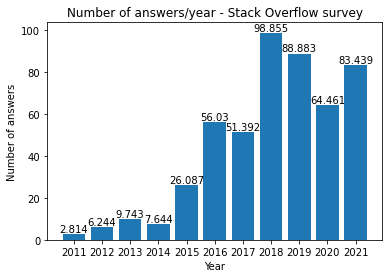

In [41]:
year = ['2011','2012','2013','2014', '2015', '2016','2017','2018','2019','2020','2021']
num = [2.814,6.244,9.743,7.644,26.087,56.030, 51.392,98.855,88.883,64.461, 83.439]
line = plt.bar(year,num)
plt.xlabel('Year')
plt.ylabel("Number of answers")

for i in range(len(num)):
    plt.annotate(str(num[i]), xy=(year[i],num[i]), ha='center', va='bottom')
plt.title('Number of answers/year - Stack Overflow survey')
plt.show()


#### Observation 1: the number of participants of the Stack Overflow survey has increased significantly after 2016.  

#### Why is this important?

#### In order to prevent bias in conclusions we will have to remember that the samples have significant different sizes.

#### ii) Columns that have no missing values in each dataframe: 

  | |Columns with no missing values |
|--|    --- | 
|stackoverflow results: 2011| {{set(df_2011.columns[df_2011.isnull().mean()==0])}}|   
|stackoverflow results: 2012| {{set(df_2012.columns[df_2012.isnull().mean()==0])}} |  
|stackoverflow results: 2013| {{set(df_2013.columns[df_2013.isnull().mean()==0])}}|
|stackoverflow results: 2014| {{set(df_2014.columns[df_2014.isnull().mean()==0])}}|
|stackoverflow results: 2015| {{set(df_2015.columns[df_2015.isnull().mean()==0])}}|
|stackoverflow results: 2016|  {{set(df_2016.columns[df_2016.isnull().mean()==0])}}|
|stackoverflow results: 2017| {{set(df_2017.columns[df_2017.isnull().mean()==0])}}|
|stackoverflow results: 2018| {{set(df_2018.columns[df_2018.isnull().mean()==0])}} |
|stackoverflow results: 2019| {{set(df_2019.columns[df_2019.isnull().mean()==0])}} |
|stackoverflow results: 2020| {{set(df_2020.columns[df_2020.isnull().mean()==0])}} |
|stackoverflow results: 2021| {{set(df_2021.columns[df_2021.isnull().mean()==0])}} |

#### iii) Columns that have the most missing values (more than 80 %)

In [61]:
most_miss_11 = set(df_2011.columns[df_2011.isnull().mean() > 0.80])
most_miss_12= set(df_2012.columns[df_2012.isnull().mean() > 0.80])
most_miss_13 = set(df_2013.columns[df_2013.isnull().mean() > 0.80])
most_miss_14 = set(df_2014.columns[df_2014.isnull().mean() > 0.80])
most_miss_15 = set(df_2015.columns[df_2015.isnull().mean() > 0.80])
most_miss_16 = set(df_2016.columns[df_2016.isnull().mean() > 0.80])
most_miss_17 = set(df_2017.columns[df_2017.isnull().mean() > 0.80])
most_miss_18 = set(df_2018.columns[df_2018.isnull().mean() > 0.80])
most_miss_19 = set(df_2019.columns[df_2019.isnull().mean() > 0.80])
most_miss_20 = set(df_2020.columns[df_2020.isnull().mean() > 0.80])
most_miss_21 = set(df_2021.columns[df_2021.isnull().mean() > 0.80])

 | |Most missing values: more than 80% |
|--|    --- | 
|stackoverflow results: 2011| {{most_miss_11}}|   
|stackoverflow results: 2012| {{most_miss_12}}|  
|stackoverflow results: 2013| {{most_miss_13}}|
|stackoverflow results: 2014| {{most_miss_14}}|
|stackoverflow results: 2015| {{most_miss_15}}|
|stackoverflow results: 2016| {{most_miss_16}}|
|stackoverflow results: 2017| {{most_miss_17}}|
|stackoverflow results: 2018| {{most_miss_18}}|
|stackoverflow results: 2019| {{most_miss_19}}|
|stackoverflow results: 2020| {{most_miss_20}}|
|stackoverflow results: 2021| {{most_miss_21}}|

#### Observation 2:  
The 2015 dataframe is the one which has more columns with > 80% with missing values. 
Maybe it is caused by multiple choice questions that are displayed by several columns?     
If we briefly investigate:

In [448]:
c_plus_plus = ((df_2015.iloc[:,12]).dropna()).value_counts()/df_2015.shape[0] # 2015 c++
python = ((df_2015.iloc[:,35]).dropna()).value_counts()/df_2015.shape[0] # 2015 python
hadoop = ((df_2015.iloc[:,23]).dropna()).value_counts()/df_2015.shape[0]
java = ((df_2015.iloc[:,26]).dropna()).value_counts()/df_2015.shape[0]
javascript = ((df_2015.iloc[:,27]).dropna()).value_counts()/df_2015.shape[0]
sql = ((df_2015.iloc[:,44]).dropna()).value_counts()/df_2015.shape[0]

| |Example to see what's happening in df_2015 |
|--|    --- | 
|C ++| {{c_plus_plus}}|   
|Hadoop| {{hadoop}} |  
|Java| {{java}}|
|Javascript| {{javascript}}|
|Python| {{python}}|
|SQL  |{{sql}}|

And it seems that it's possible to reach the proportion of individuals that used each programming language (and it explains the high proportion of null values in each of these columns).

#### iv) First glance: select main columns of interest; making some questions...  
We want to select the results (columns) that will allow us to answer our main questions. 
We first investigate the most popular programming languages currently used in each year:

#### Most popular language in 2011: Java

In [65]:
#most popular language in 2011: languages proficiency - Java
lang_11 = (((df_2011.iloc[:,12]).dropna()).value_counts())/df_2011.shape[0] #drop null values and get proportion
lang_11

Java    0.306326
Name: Which languages are you proficient in?, dtype: float64

#### Most popular language in 2012: Java

In [71]:
#most popular language in 2012 - Java
lang_12 = (((df_2012.iloc[:,11]).dropna()).value_counts())/df_2012.shape[0] #drop null values and get proportion
lang_12

Java    0.376201
Name: Which languages are you proficient in?, dtype: float64

#### Most popular language in 2013: C

In [79]:
#most popular languages in 2013: languages used in past year
lang_13 = (((df_2013.iloc[:,16]).dropna()).value_counts())/df_2013.shape[0] #drop null values and get proportion
lang_13

C    0.147491
Name: Which of the following languages or technologies have you used significantly in the past year?, dtype: float64

#### Most popular language in 2014: C

In [88]:
#most popular languages in 2014: languages used in past year - C
lang_14 = (((df_2014.iloc[:,17]).dropna()).value_counts())/df_2014.shape[0] #drop null values and get proportion
lang_14

C    0.153715
Name: Which of the following languages or technologies have you used significantly in the past year?, dtype: float64

#### Most popular language in 2015: Javascript

In [157]:
#most popular languages in 2015: languages used in past year - Javascript
lang_15 = (((df_2015.iloc[:,27]).dropna()).value_counts())/df_2015.shape[0]
lang_15

JavaScript                         0.458543
Current Lang & Tech: JavaScript    0.000038
Name: Current Lang & Tech: JavaScript, dtype: float64

Javascript is the most popular programming language in 2015:

Android-> 15,8%; C -> 13,84%; PHP->25%; Python -> 20,1%; SQL-> 36,2%; SQL Server-> 15,8%; java->31,5%; javascript -> 45,9%

### A)  Until now (2011-2015):

#### 1) Java is the top language (and the only one listed) in 2011 and 2012;
#### 2) C is the most used language (and the only one listed) in 2013 and 2014;
#### 3) Javascript is the most used language in 2015.

### B) Some questions about A):

#### 1) Why until 2014 only one programming language is selected?

#### It could be for multiple factors, but we must be sure:
#### - it is not because of null values 
#### - or because there are no diversification in occupations.

#### Let's select an year that has the lowest value for the programming language choice - 2013:

In [207]:
(df_2013.iloc[:,6]).isnull().sum()/len(df_2013)*100 #proportion of null values in 2013


15.641999384173252

#### The proportion of null values is in 15%.

#### Now let's plot occupations:

Text(0.5, 1.0, 'Which of the following best describes your occupation? (2013)')

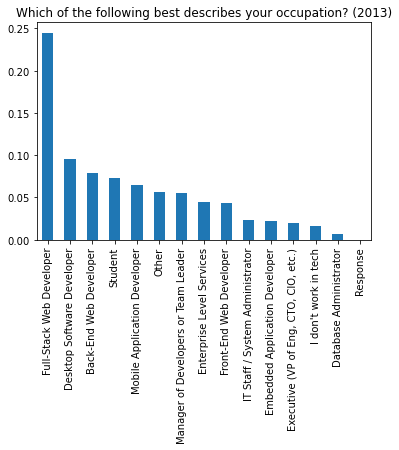

In [209]:
#drop null values,get proportion and plot
((((df_2013.iloc[:,6]).dropna()).value_counts())/df_2013.shape[0]).plot(kind="bar") 
plt.title('Which of the following best describes your occupation? (2013)')

#### Now, to get a clearer idea, we'll plot the occupations of 2015 (- because it has a much more diverse list of programming languages, as we have seen above):

Text(0.5, 1.0, 'Occupation (2015)')

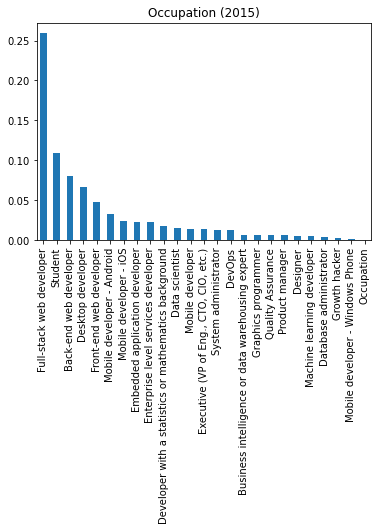

In [216]:
#drop null values,get proportion and plot
((((df_2015.iloc[:,5]).dropna()).value_counts())/df_2015.shape[0]).plot(kind="bar")
plt.title('Occupation (2015)')

### Coutries - analyse sample diversification

#### From 2015 there are multiple countries represented (inspite of a low number of answers when compared with other years):

In [24]:
((df_2015.iloc[:,0]).dropna()).value_counts()

United States             4745
India                     2461
United Kingdom            2403
Germany                   1976
Poland                     833
                          ... 
San Marino                   1
Mauritania                   1
Liechtenstein                1
Congo {Democratic Rep}       1
Vanuatu                      1
Name: Country, Length: 157, dtype: int64

#### But until 2015, the sample was very homogeneous:

In [22]:
((df_2014.iloc[:,1]).dropna()).value_counts()

California        286
New York          171
Washington        110
Texas             105
Pennsylvania       96
Ohio               93
Massachusetts      90
Illinois           83
Florida            81
Virginia           76
New Jersey         65
Colorado           64
Minnesota          62
Michigan           54
Utah               51
North Carolina     50
Maryland           49
Wisconsin          47
Missouri           42
Oregon             40
Georgia            40
Arizona            39
Tennessee          31
Indiana            22
Connecticut        22
Iowa               22
Alabama            22
Kansas             19
New Hampshire      18
Nebraska           17
South Carolina     16
Idaho              16
Oklahoma           15
Kentucky           13
Washington DC      12
Nevada              9
Vermont             8
Alaska              7
Arkansas            6
Louisiana           5
Montana             5
Rhode Island        5
Mississippi         4
Delaware            4
South Dakota        4
New Mexico

#### In fact, 2015 has a much more diverse sample (comparing with 2011 - 2014).

#### However, we ought to make a decision:

### Problems: 

#### Until 2014 the samples are very restricted: 
#### 1 - only one preferred language pointed;
#### (and until 2015 we also have:)
#### 2 - low number of respondents (in comparison with 2016 - 2021);
#### 3 - less information to compare in order to understand our main goals.

#### In fact, all the survey answers in the first five years (2011-2015: 52532 answers) are less than only one year between 2016 - 2021 (except 2017 that has 51392 answers).

#### If to that problem (of a low /restricted  sample per year) we find some other restrictions:
#### - lack of some informations about our main goals (that the other dataframes - 2016: 2021 - have);
#### - some possible bias because of retricted representation.

#### Because of that enumerated reasons, we'll work only with the datasets from 2016 to 2021. 


In [51]:
# most popular language in 2016
lang_2016 =(df_2016.iloc[:,16]).dropna() #identify column and remove null values
lang_2016

1                                         iOS; Objective-C
6        Android; Arduino / Raspberry Pi; AngularJS; C;...
7                          JavaScript; PHP; SQL; WordPress
9                                                      PHP
10       Arduino / Raspberry Pi; C; C++; Java; JavaScri...
                               ...                        
56020                              C++; JavaScript; Python
56022    Arduino / Raspberry Pi; AngularJS; CoffeeScrip...
56024                       Android; C; C++; C#; Java; SQL
56026       Arduino / Raspberry Pi; C; Java; Python; Swift
56029    Arduino / Raspberry Pi; AngularJS; JavaScript;...
Name: tech_do, Length: 49025, dtype: object

#### This data (2016) must be cleaned! -   we'll do it right away.

#### But first:

#### a) Before cleaning the data let's create a function that allows consulting the questions of each dataframe (since 2017 it is provided a schema of the survey):

In [220]:
def read_question_2017(column_name, schema=schema_2017):
    '''
    INPUT - column_name: string, name of the column that we want to read
            schema: pandas dataframe with the schema of the survey
    OUTPUT - question: string, the column description that corresponds to the survey question
    '''
    question = list(schema[schema['Column'] == column_name]['Question'])[0]
    return question

In [43]:
#we can change the variable schema inside the function to query other years: 2018 - 2020

def read_question(column_name, schema=schema_2020):
    '''
    INPUT - column_name: string, name of the column that we want to read
            schema: pandas dataframe with the schema of the survey
    OUTPUT - question: string, the column description that corresponds to the survey question
    '''
    question = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return question

In [284]:
#2017 - reading questions
read_question_2017(df_2017.columns[1])

'Which of the following best describes you?'

In [13]:
#example: 2017 - reading questions
read_question_2017('HaveWorkedLanguage')

'Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?'

In [24]:
#2018 - reading questions
read_question(df_2018.columns[25])

'Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The diversity of the company or organization'

In [286]:
#2019 - reading questions
read_question(df_2019.columns[1])

'Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."'

In [58]:
#2020 - reading questions
read_question(df_2020.columns[2])

'Do you code as a hobby?'

### 3 -  Data Preparation.

### Gathering and wrangling:

### Popular Languages: 2016 

#### Have worked Languages 


In [52]:
#2016: tech do
work_lang_2016 = lang_2016.value_counts().reset_index()
work_lang_2016.head()

,index,tech_do
0,Java,843
1,C#,606
2,C#; JavaScript; SQL; SQL Server,561
3,Android; Java,515
4,Python,501


In [54]:
work_lang_2016.rename(columns={'index': 'Language', 'tech_do': 'count'}, inplace=True)
work_lang_2016.head()

,Language,count
0,Java,843
1,C#,606
2,C#; JavaScript; SQL; SQL Server,561
3,Android; Java,515
4,Python,501


In [55]:
#list of all the possible answers_2016
list_of_lang = ["Android", "AngularJS", "C", "C#", "Cloud (AWS, GAE, Azure, etc.)", 
                "Hadoop", "Java", "JavaScript", "Node.js", "Redis", "Ruby", "Spark",
                "SQL", "LAMP", "MongoDB", "Objective-C", "PHP", "Python", "SQL Server"
                "Windows Phone", "ios", "Matlab", "Visual Basic", "Go", "Wordpress", 
                "Perl", "PHP", "R", "Ruby", "WordPress", "ReactJS", "Salesforce", "Swift"
                "Redis", "Windows Phone", "Hadoop", "Cassandra", "CoffeeScript"
                "Haskell","Rust", "Redis", "F#", "Scala", "ios",
                "Cordova", "SharePoint"]

In [99]:
def lang_count(df, col1, col2, str_list):
    '''
    INPUT:
    df - the pandas dataframe 
    col_1 - column name we want to look through
    col_2 - column we want to count values from
    str_list - a list where we look in each row
    
    OUTPUT:
    new_df - the dataframe that show up the counting
    '''
    new_df = defaultdict(int)
    for lang in str_list:
        for idx in range(df.shape[0]):
            if lang in df[col1][idx]:
                new_df[lang] += int(df[col2][idx])   
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [57]:
#The results:
lang_2016_df = lang_count(work_lang_2016, 'Language', 'count', list_of_lang)
lang_2016_df.set_index('Language', inplace=True)

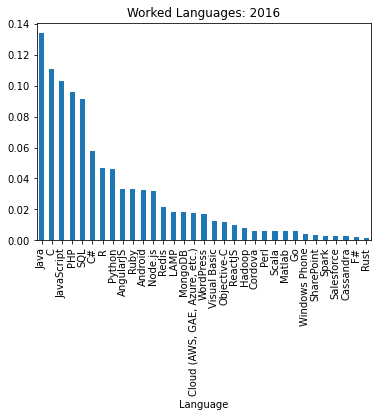

In [213]:
## results with the percent
lang_2016_df['perc'] = lang_2016_df['count']/np.sum(lang_2016_df['count'])
## plot bar chart
(lang_2016_df['perc']).plot(kind="bar")
title= 'Worked Languages: 2016'
plt.title(title)
plt.show()

#### The top 5 popular worked languages in 2016:
#### 1 - Java;  2 - C;  3 - JavaScript;  4 - PHP  5 - SQL.

###  Programming languages that people want to learn: 2016 

In [215]:
fut_lang_16=(df_2016.iloc[:,17]).dropna()
want_lang_2016 = fut_lang_16.value_counts().reset_index()
want_lang_2016.head()

,index,tech_want
0,C#,538
1,Python,474
2,Java,411
3,C++,405
4,Android,377


In [216]:
want_lang_2016.rename(columns={'index': 'Language', 'tech_want': 'count'}, inplace=True)
want_lang_2016.head()

,Language,count
0,C#,538
1,Python,474
2,Java,411
3,C++,405
4,Android,377


In [217]:
#The results:
fut_lang_16_df = lang_count(want_lang_2016, 'Language', 'count', list_of_lang)
fut_lang_16_df.set_index('Language', inplace=True)

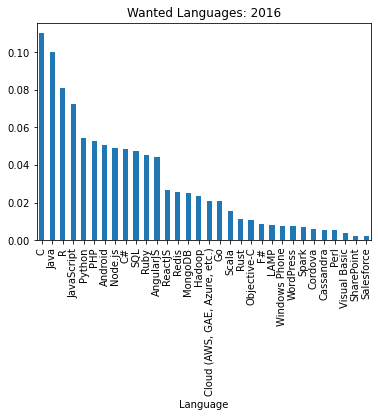

In [218]:
# # results with the percent
fut_lang_16_df['perc'] = fut_lang_16_df['count']/np.sum(fut_lang_16_df['count'])
## plot bar chart
(fut_lang_16_df['perc']).plot(kind="bar")
title= 'Wanted Languages: 2016'
plt.title(title)
plt.show()

#### The top 5 popular wanted languages in 2016:
#### 1 - C;   2 - Java ;  3 - R;  4 - JavaScript;  5 - Python.



### Popular Languages: 2017 


####  Have Worked Languages 

In [221]:
read_question_2017('HaveWorkedLanguage')

'Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?'

In [10]:
#let's see all Have worked languages:
work_lang_2017 = df_2017['HaveWorkedLanguage'].value_counts().reset_index()
work_lang_2017.head()

,index,HaveWorkedLanguage
0,C#; JavaScript; SQL,1276
1,JavaScript; PHP; SQL,1143
2,Java,913
3,JavaScript,807
4,JavaScript; PHP,662


In [11]:
#But we don´t want it to be grouped by participant responses, so let's clean:
work_lang_2017.rename(columns={'index': 'Language', 'HaveWorkedLanguage': 'count'}, inplace=True)
work_lang_2017.head()

,Language,count
0,C#; JavaScript; SQL,1276
1,JavaScript; PHP; SQL,1143
2,Java,913
3,JavaScript,807
4,JavaScript; PHP,662


In [12]:
#list of all the possible answers - 2017
list_of_lang = ["Assembly", "C", "C++","C#" "Clojure","CoffeScript", "Common Lisp","Dart",
                "Elixir","Erlang","Hack","F#", "Go","Groovy","Haskell","Java", "JavaScript",
                "Julia","Lua","Matlab","Objective-C","Perl","Python", "R","Ruby","Rust",
                "Scala","Smaltalk","SQL","Swift","TypeScript","VBA","VB.NET","Visual Basic 6"]

In [13]:
#The results:
lang_2017_df = lang_count(work_lang_2017, 'Language', 'count', list_of_lang)
lang_2017_df.set_index('Language', inplace=True)

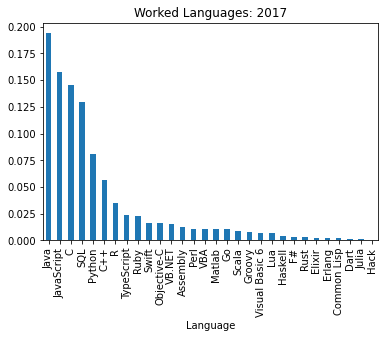

In [226]:
## results with the percent
lang_2017_df['perc'] = lang_2017_df['count']/np.sum(lang_2017_df['count'])
## plot bar chart
(lang_2017_df['perc']).plot(kind="bar")
title= 'Worked Languages: 2017'
plt.title(title)
plt.show()

#### The top 5 popular worked languages in 2017:
#### 1 - Java;  2 - JavaScript;  3 - C;  4 - SQL;  5 - Python.


###  Programming languages that people want to learn: 2017 

In [227]:
want_lang_2017 = df_2017['WantWorkLanguage'].value_counts().reset_index()
want_lang_2017.head()

,index,WantWorkLanguage
0,JavaScript,642
1,Python,556
2,Java,544
3,C#,475
4,C#; JavaScript; SQL,444


In [228]:
#But we don´t want it to be grouped by participant responses, so let's clean:
want_lang_2017.rename(columns={'index': 'Language', 'WantWorkLanguage': 'count'}, inplace=True)
want_lang_2017.head()

,Language,count
0,JavaScript,642
1,Python,556
2,Java,544
3,C#,475
4,C#; JavaScript; SQL,444


In [229]:
#The results:
fut_lang_17_df = lang_count(want_lang_2017, 'Language', 'count', list_of_lang)
fut_lang_17_df.set_index('Language', inplace=True)

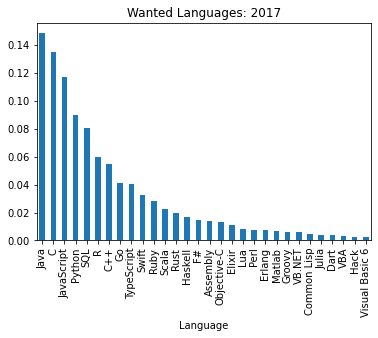

In [230]:
# # results with the percent
fut_lang_17_df['perc'] = fut_lang_17_df['count']/np.sum(fut_lang_17_df['count'])
## plot bar chart
(fut_lang_17_df['perc']).plot(kind="bar")
title= 'Wanted Languages: 2017'
plt.title(title)
plt.show()

#### The top 5 popular worked languages in 2017:
#### 1 - Java;  2 - C;  3 -JavaScript;  4 - Python;  5 - SQL.


### Popular Languages  2018:

#### Have Worked Languages

In [26]:
read_question('LanguageWorkedWith')

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [108]:
#list of all the possible answers - 2018
list_of_lang = ["Assembly", "Bash/Shell","C", "C++","C#","Clojure","Cobol","CoffeScript", "Common Lisp","Dart",
                "CSS","Delphi/Object Pascal","Elixir","Erlang","Hack","F#", "Go","Groovy","Haskell","HTML","Java", 
                "JavaScript","Julia","Kotlin","Lua","Matlab","Objective-C","Perl","Python", "R","Ruby","Rust",
                "Scala","Smaltalk","SQL","Swift","TypeScript","VBA","VB.NET","Visual Basic 6"]

In [86]:
#let's see all Have worked languages:
work_lang_2018 = df_2018['LanguageWorkedWith'].value_counts().reset_index()
work_lang_2018.head()

,index,LanguageWorkedWith
0,C#;JavaScript;SQL;HTML;CSS,1347
1,JavaScript;PHP;SQL;HTML;CSS,1235
2,Java,1030
3,JavaScript;HTML;CSS,881
4,C#;JavaScript;SQL;TypeScript;HTML;CSS,828


In [87]:
#But we don´t want it to be grouped by participant responses, so let's clean:
work_lang_2018.rename(columns={'index': 'Language', 'LanguageWorkedWith': 'count'}, inplace=True)
work_lang_2018.head()

,Language,count
0,C#;JavaScript;SQL;HTML;CSS,1347
1,JavaScript;PHP;SQL;HTML;CSS,1235
2,Java,1030
3,JavaScript;HTML;CSS,881
4,C#;JavaScript;SQL;TypeScript;HTML;CSS,828


In [88]:
#The results:
lang_2018_df = lang_count(work_lang_2018, 'Language', 'count', list_of_lang)
lang_2018_df.set_index('Language', inplace=True)

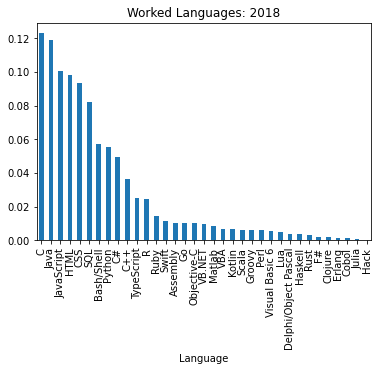

In [235]:
## results with the percent
lang_2018_df['perc'] = lang_2018_df['count']/np.sum(lang_2018_df['count'])
## plot bar chart
(lang_2018_df['perc']).plot(kind="bar")
title= 'Worked Languages: 2018'
plt.title(title)
plt.show()

#### The top 5 popular worked languages in 2018:
#### 1 - C;  2 -Java;  3 - JavaScript;  4 - HTML;  5 -CSS.


### Programming languages that people want to learn: 2018

In [79]:
want_lang_2018 = df_2018['LanguageDesireNextYear'].value_counts().reset_index()
want_lang_2018.head()

,index,LanguageDesireNextYear
0,Python,908
1,Java,608
2,C#;JavaScript;SQL;TypeScript;HTML;CSS,605
3,C#,594
4,JavaScript;HTML;CSS,550


In [82]:
#But we don´t want it to be grouped by participant responses, so let's clean:
want_lang_2018.rename(columns={'index': 'Language', 'LanguageDesireNextYear': 'count'}, inplace=True)
want_lang_2018.head()

,Language,count
0,Python,908
1,Java,608
2,C#;JavaScript;SQL;TypeScript;HTML;CSS,605
3,C#,594
4,JavaScript;HTML;CSS,550


In [83]:
#The results:
fut_lang_18_df = lang_count(want_lang_2018, 'Language', 'count', list_of_lang)
fut_lang_18_df.set_index('Language', inplace=True)

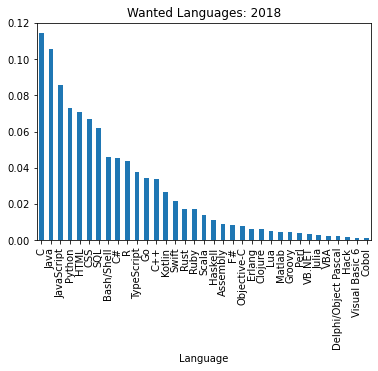

In [239]:
## results with the percent
fut_lang_18_df['perc'] = fut_lang_18_df['count']/np.sum(fut_lang_18_df['count'])
## plot bar chart
(fut_lang_18_df['perc']).plot(kind="bar")
title= 'Wanted Languages: 2018'
plt.title(title)
plt.show()

#### The top 5 popular wanted languages in 2018:
#### 1 - C;  2 -Java;  3 - JavaScript;  4 - Python;  5 - HTML.



### Popular Languages: 2019 


#### Have worked Languages: 2019 

In [37]:
read_question('LanguageWorkedWith')

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [109]:
list_of_lang = ["Assembly", "Bash/Shell","C", "C++","C#","Clojure","Cobol","CoffeScript", "Common Lisp","Dart",
                "CSS","Delphi/Object Pascal","Elixir","Erlang","Hack","F#", "Go","Groovy","Haskell","HTML","Java", 
                "JavaScript","Julia","Kotlin","Lua","Matlab","Objective-C","Perl","Python", "R","Ruby","Rust",
                "Scala","Smaltalk","SQL","Swift","TypeScript","VBA","VB.NET","Visual Basic 6"]

In [101]:
#let's see all Have worked languages:
work_lang_2019 = df_2019['LanguageWorkedWith'].value_counts().reset_index()
work_lang_2019.head()

,index,LanguageWorkedWith
0,HTML/CSS;JavaScript;PHP;SQL,1483
1,C#;HTML/CSS;JavaScript;SQL,1414
2,HTML/CSS;JavaScript,1247
3,C#;HTML/CSS;JavaScript;SQL;TypeScript,990
4,Java,934


In [103]:
#But we don´t want it to be grouped by participant responses, so let's clean:
work_lang_2019.rename(columns={'index': 'Language', 'LanguageWorkedWith': 'count'}, inplace=True)
work_lang_2019.head()

,Language,count
0,HTML/CSS;JavaScript;PHP;SQL,1483
1,C#;HTML/CSS;JavaScript;SQL,1414
2,HTML/CSS;JavaScript,1247
3,C#;HTML/CSS;JavaScript;SQL;TypeScript,990
4,Java,934


In [105]:
#The results:
lang_2019_df = lang_count(work_lang_2019, 'Language', 'count', list_of_lang)
lang_2019_df.set_index('Language', inplace=True)

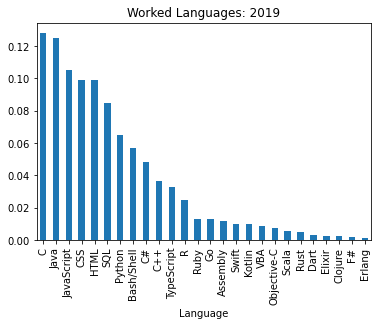

In [245]:
## results with the percent
lang_2019_df['perc'] = lang_2019_df['count']/np.sum(lang_2019_df['count'])
## plot bar chart
(lang_2019_df['perc']).plot(kind="bar")
title= 'Worked Languages: 2019'
plt.title(title)
plt.show()

#### The top 5 popular worked languages in 2019:
#### 1 - C;  2 -Java;  3 - JavaScript;  4 - CSS;  5 - HTML.


### Programming languages that people want to learn: 2019 

In [146]:
want_lang_2019 = df_2019['LanguageDesireNextYear'].value_counts().reset_index()
want_lang_2019.head()


,index,LanguageDesireNextYear
0,Python,1236
1,HTML/CSS;JavaScript,697
2,HTML/CSS;JavaScript;TypeScript,648
3,C#,607
4,Java,584


In [246]:
#But we don´t want it to be grouped by participant responses, so let's clean:
want_lang_2019.rename(columns={'index': 'Language', 'LanguageDesireNextYear': 'count'}, inplace=True)
want_lang_2019.head()

,Language,count
0,Python,1236
1,HTML/CSS;JavaScript,697
2,HTML/CSS;JavaScript;TypeScript,648
3,C#,607
4,Java,584


In [248]:
#The results:
fut_lang_19_df = lang_count(want_lang_2019, 'Language', 'count', list_of_lang)
fut_lang_19_df.set_index('Language', inplace=True)

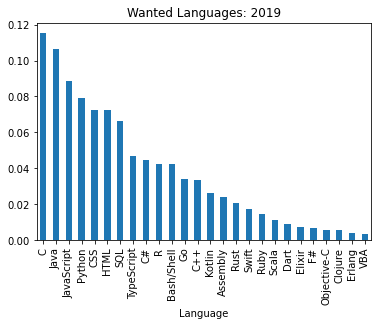

In [249]:
## results with the percent
fut_lang_19_df['perc'] = fut_lang_19_df['count']/np.sum(fut_lang_19_df['count'])
## plot bar chart
(fut_lang_19_df['perc']).plot(kind="bar")
title= 'Wanted Languages: 2019'
plt.title(title)
plt.show()

#### The top 5 popular worked languages in 2019:
#### 1 - C;  2 -Java;  3 - JavaScript;  4 - Python;  5 - CSS.


### Popular Languages: 2020 


#### Have Worked Languages

In [44]:
read_question('LanguageWorkedWith')

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [106]:
#let's see all Have worked languages:
work_lang_2020 = df_2020['LanguageWorkedWith'].value_counts().reset_index()
work_lang_2020.head()

,index,LanguageWorkedWith
0,HTML/CSS;JavaScript;PHP;SQL,1073
1,HTML/CSS;JavaScript,900
2,C#;HTML/CSS;JavaScript;SQL,856
3,C#;HTML/CSS;JavaScript;SQL;TypeScript,754
4,HTML/CSS;JavaScript;TypeScript,697


In [110]:
#But we don´t want it to be grouped by participant responses, so let's clean:
work_lang_2020.rename(columns={'index': 'Language', 'LanguageWorkedWith': 'count'}, inplace=True)
work_lang_2020.head()

,Language,count
0,HTML/CSS;JavaScript;PHP;SQL,1073
1,HTML/CSS;JavaScript,900
2,C#;HTML/CSS;JavaScript;SQL,856
3,C#;HTML/CSS;JavaScript;SQL;TypeScript,754
4,HTML/CSS;JavaScript;TypeScript,697


In [111]:
#The results:
lang_2020_df = lang_count(work_lang_2020, 'Language', 'count', list_of_lang)
lang_2020_df.set_index('Language', inplace=True)

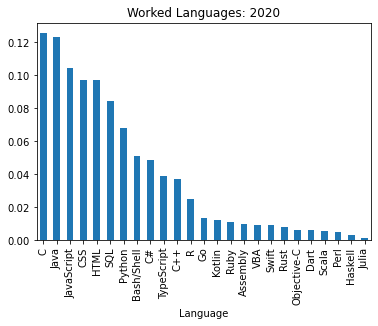

In [252]:
## results with the percent
lang_2020_df['perc'] = lang_2020_df['count']/np.sum(lang_2020_df['count'])
## plot bar chart
(lang_2020_df['perc']).plot(kind="bar")
title= 'Worked Languages: 2020'
plt.title(title)
plt.show()

#### The top 5 popular worked languages in 2020:
#### 1 - C;  2 -Java;  3 - Javascript;  4 - CSS;  5 - HTML.


### Programming languages that people want to learn: 2020 

In [253]:
want_lang_2020 = df_2020['LanguageDesireNextYear'].value_counts().reset_index()
want_lang_2020.head()

,index,LanguageDesireNextYear
0,Python,1152
1,Rust,528
2,HTML/CSS;JavaScript;TypeScript,499
3,C#,461
4,Go,412


In [254]:
#But we don´t want it to be grouped by participant responses, so let's clean:
want_lang_2020.rename(columns={'index': 'Language', 'LanguageDesireNextYear': 'count'}, inplace=True)
want_lang_2020.head()

,Language,count
0,Python,1152
1,Rust,528
2,HTML/CSS;JavaScript;TypeScript,499
3,C#,461
4,Go,412


In [255]:
#The results:
fut_lang_20_df = lang_count(want_lang_2020, 'Language', 'count', list_of_lang)
fut_lang_20_df.set_index('Language', inplace=True)

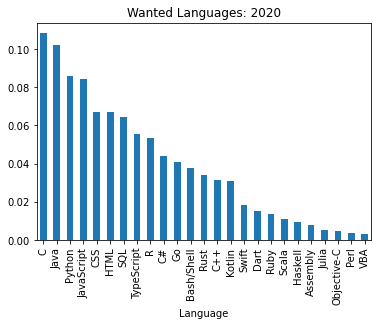

In [256]:
## results with the percent
fut_lang_20_df['perc'] = fut_lang_20_df['count']/np.sum(fut_lang_20_df['count'])
## plot bar chart
(fut_lang_20_df['perc']).plot(kind="bar")
title= 'Wanted Languages: 2020'
plt.title(title)
plt.show()

#### The top 5 popular worked languages in 2020:
#### 1 - C;  2 -Java;  3 - Python;  4 - JavaScript;  5 - CSS.


### Popular Languages: 2021 


#### Have Worked Languages 

In [115]:
lang_2021 =(df_2021.iloc[:,16]).dropna() #identify column and remove null values

In [116]:
#list of all the possible answers - 2021
list_of_lang = ["Assembly", "Bash/Shell","C", "C++","C#","Clojure","Cobol","CoffeScript", "Common Lisp","Dart",
                "CSS","Delphi/Object Pascal","Elixir","Erlang","Hack","F#", "Go","Groovy","Haskell","HTML","Java", 
                "JavaScript","Julia","Kotlin","Lua","Matlab","Node.js","Objective-C","Perl","Python", "R","Ruby","Rust",
                "Scala","Smaltalk","SQL","Swift","TypeScript","VBA","VB.NET","Visual Basic 6"]

In [117]:
work_lang_2021 = lang_2021.value_counts().reset_index()
work_lang_2021.head()

,index,LanguageHaveWorkedWith
0,Python,1337
1,HTML/CSS;JavaScript;Node.js;TypeScript,811
2,Java,715
3,HTML/CSS;JavaScript;PHP;SQL,674
4,C#,597


In [118]:
work_lang_2021.rename(columns={'index': 'Language', 'LanguageHaveWorkedWith': 'count'}, inplace=True)
work_lang_2021.head()

,Language,count
0,Python,1337
1,HTML/CSS;JavaScript;Node.js;TypeScript,811
2,Java,715
3,HTML/CSS;JavaScript;PHP;SQL,674
4,C#,597


In [119]:
#The results:
lang_2021_df = lang_count(work_lang_2021, 'Language', 'count', list_of_lang)
lang_2021_df.set_index('Language', inplace=True)

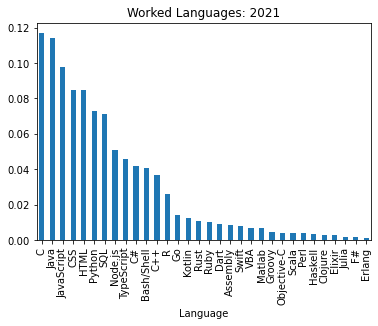

In [196]:
## results with the percent
lang_2021_df['perc'] = lang_2021_df['count']/np.sum(lang_2021_df['count'])
## plot bar chart
(lang_2021_df['perc']).plot(kind="bar")
title= 'Worked Languages: 2021'
plt.title(title)
plt.show()

#### The top 5 popular worked languages in 2021:
#### 1 - C;  2 -Java;  3 - Javascript;  4 - CSS;  5 - HTML.


### Programming languages that people want to learn: 2021 

In [197]:
lang_2021 =(df_2021.iloc[:,17]).dropna() #identify column and remove null values

In [198]:
want_lang_2021 = lang_2021.value_counts().reset_index()
want_lang_2021.head()

,index,LanguageWantToWorkWith
0,Python,1389
1,Rust,821
2,HTML/CSS;JavaScript;Node.js;TypeScript,812
3,C#,700
4,Java,512


In [199]:
want_lang_2021.rename(columns={'index': 'Language', 'LanguageWantToWorkWith': 'count'}, inplace=True)
want_lang_2021.head()

,Language,count
0,Python,1389
1,Rust,821
2,HTML/CSS;JavaScript;Node.js;TypeScript,812
3,C#,700
4,Java,512


In [200]:
#The results:
fut_lang_21_df = lang_count(want_lang_2021, 'Language', 'count', list_of_lang)
fut_lang_21_df.set_index('Language', inplace=True)

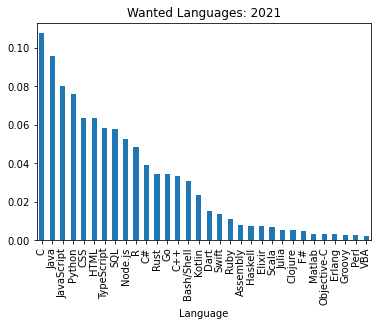

In [201]:
## results with the percent
fut_lang_21_df['perc'] = fut_lang_21_df['count']/np.sum(fut_lang_21_df['count'])
## plot bar chart
(fut_lang_21_df['perc']).plot(kind="bar")
title= 'Wanted Languages: 2021'
plt.title(title)
plt.show()

#### The top 5 popular wanted languages in 2021:
#### 1 - C;  2 -Java;  3 - JavaScript;  4 - Python;  5 - CSS.


### Some sorted questions:

#### occupation 2016

Text(0.5, 1.0, ' occupation? (2016)')

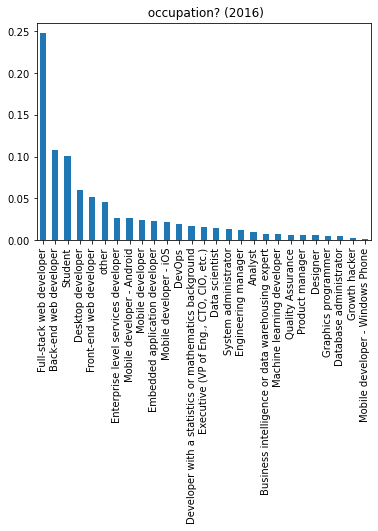

In [419]:
#drop null values,get proportion and plot
((((df_2016.iloc[:,9]).dropna()).value_counts())/df_2016.shape[0]).plot(kind="bar") 
plt.title(' occupation? (2016)')

#### Do people who program as a hobby tend to reach higher salaries?

In [362]:
#2017
df_2017.groupby(['ProgramHobby']).mean()['Salary'].sort_values().dropna()

ProgramHobby
No                                           53890.797405
Yes, I program as a hobby                    54530.681984
Yes, I contribute to open source projects    59019.558827
Yes, both                                    60393.567188
Name: Salary, dtype: float64

In [435]:
#2020
df_2020.groupby(['Hobbyist']).mean()['ConvertedComp'].sort_values().dropna()

Hobbyist
No     100895.016853
Yes    104621.243086
Name: ConvertedComp, dtype: float64

#### With very closed values, but, apparently, people who code for hobby do have higher salaries .

#### Do people with more years of professional coding have higher salaries?

In [423]:
#2017
df_2017.groupby(['YearsCodedJob']).mean()['Salary'].sort_values().dropna()

YearsCodedJob
Less than a year    33298.752045
1 to 2 years        34152.737761
2 to 3 years        38715.287566
3 to 4 years        44545.600363
4 to 5 years        50307.658965
5 to 6 years        52440.943126
6 to 7 years        57454.154137
7 to 8 years        58952.900696
9 to 10 years       63120.608546
8 to 9 years        66454.535465
10 to 11 years      67455.782631
11 to 12 years      71432.175258
13 to 14 years      75496.373677
16 to 17 years      77528.611481
15 to 16 years      79883.655653
12 to 13 years      82845.424947
14 to 15 years      82865.327534
19 to 20 years      86989.034884
18 to 19 years      87653.796607
17 to 18 years      87996.924977
20 or more years    98128.097477
Name: Salary, dtype: float64

#### As expected, people who are very satisfied in their jobs have higher salaries:

In [428]:
#salary in USD
df_2020.groupby(['JobSat']).mean()['ConvertedComp'].sort_values().dropna()


JobSat
Neither satisfied nor dissatisfied     91748.645352
Slightly dissatisfied                  95691.666029
Slightly satisfied                     97914.980343
Very dissatisfied                      98499.218481
Very satisfied                        119251.118370
Name: ConvertedComp, dtype: float64

#### It seems that the country you live has a non neglectable influence in the salaries:

In [434]:
df_2020.groupby(['Country']).mean()['ConvertedComp'].sort_values().dropna()



Country
Lesotho                                 24.000000
Brunei Darussalam                     2580.000000
Sudan                                 3795.000000
Burkina Faso                          3960.000000
Cameroon                              4450.600000
                                        ...      
Afghanistan                         148290.125000
Ireland                             183000.740351
United States                       208826.496443
Lao People's Democratic Republic    231275.250000
Nomadic                             310924.142857
Name: ConvertedComp, Length: 159, dtype: float64

###  The more programming languages you know the higher your salary?

In [94]:
sal_16 = (df_2016.iloc[:,14]).dropna()
lang_sal_16= (pd.concat([work_lang_2016, sal_16], axis=1)).dropna()
lang_sal_16.sort_values(by =['salary_midpoint'], ascending=False)

,Language,count,salary_midpoint
18412,"Android; AngularJS; C#; Cloud (AWS, GAE, Azure...",1.0,210000.0
10924,"C; C++; C#; Cloud (AWS, GAE, Azure, etc.); PHP...",1.0,210000.0
15152,"AngularJS; C#; Cloud (AWS, GAE, Azure, etc.); ...",1.0,210000.0
8908,"Android; AngularJS; Cloud (AWS, GAE, Azure, et...",1.0,210000.0
9157,"AngularJS; Cassandra; Cloud (AWS, GAE, Azure, ...",1.0,210000.0
...,...,...,...
13085,Android; Java; JavaScript; MongoDB; SQL Server,1.0,5000.0
13082,C#; JavaScript; MongoDB; Node.js; ReactJS; SQL...,1.0,5000.0
13080,"C#; Cloud (AWS, GAE, Azure, etc.); JavaScript;...",1.0,5000.0
13079,Android; iOS; Objective-C; SQL,1.0,5000.0


In [92]:
sal_17=(df_2017['Salary']).dropna()
lang_sal_17= (pd.concat([work_lang_2017, sal_17], axis=1)).dropna()
lang_sal_17.sort_values(by =['Salary'], ascending=False)

,Language,count,Salary
6743,Assembly; C; C#; Java; JavaScript; Matlab; PHP...,1.0,195000.000000
1696,Java; JavaScript; Matlab; Scala,2.0,195000.000000
6717,Java; PHP; Python; Scala,1.0,193750.000000
2370,C; CoffeeScript; Elixir; Go; JavaScript; Ruby;...,1.0,192000.000000
1352,C#; JavaScript; SQL; TypeScript; VB.NET; VBA,3.0,190000.000000
...,...,...,...
7078,C++; Matlab; Perl; Python,1.0,1.495774
8154,Assembly; C; Lua; Perl; Python,1.0,0.757576
3011,C#; Hack; JavaScript; Matlab; SQL,1.0,0.117457
2951,C; C++; Go; JavaScript; Lua; PHP; Python,1.0,0.000000


In [90]:
sal_18=(df_2017['Salary']).dropna()
lang_sal_18= (pd.concat([work_lang_2018, sal_18], axis=1)).dropna()
lang_sal_18.sort_values(by =['Salary'], ascending=False)

,Language,count,Salary
18237,C#;JavaScript;Python;Ruby;SQL;VB.NET;HTML;CSS;...,1.0,195000.000000
1696,JavaScript;PHP;SQL;TypeScript;VB.NET;HTML;CSS,5.0,195000.000000
6743,C;C++;Java;JavaScript;Matlab;PHP;Python;R;Scal...,1.0,195000.000000
6717,C++;Java;Swift;Kotlin,1.0,193750.000000
2370,C++;C#;SQL;Visual Basic 6,4.0,192000.000000
...,...,...,...
9082,C++;Go;Python;R;SQL;TypeScript;Bash/Shell,1.0,0.014682
23953,C++;Go;Java;JavaScript;Python;R;Scala;SQL;Bash...,1.0,0.000000
23907,C;C++;CoffeeScript;JavaScript;SQL;TypeScript;H...,1.0,0.000000
4517,C;C++;PHP;SQL;Delphi/Object Pascal;HTML;CSS,2.0,0.000000


In [122]:
sal_19=(df_2019['ConvertedComp']).dropna()
lang_sal_19= (pd.concat([work_lang_2019, sal_19], axis=1)).dropna()
lang_sal_19.sort_values(by =['ConvertedComp'], ascending=False)

,Language,count,ConvertedComp
20097,Assembly;Bash/Shell/PowerShell;C;C#;HTML/CSS;J...,1.0,2000000.0
14519,Bash/Shell/PowerShell;C;C++;Java;JavaScript;Ob...,1.0,2000000.0
14668,Bash/Shell/PowerShell;C;C++;C#;Go;HTML/CSS;Jav...,1.0,2000000.0
15762,Bash/Shell/PowerShell;C#;Rust,1.0,2000000.0
7816,Bash/Shell/PowerShell;C;C++;Dart;Go;HTML/CSS;J...,1.0,2000000.0
...,...,...,...
1494,C;C++;C#;HTML/CSS;PHP;SQL,7.0,0.0
11499,C#;Clojure;HTML/CSS;JavaScript;PHP;SQL;TypeScript,1.0,0.0
11325,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,1.0,0.0
11206,Bash/Shell/PowerShell;C#;Go;HTML/CSS;Java;Java...,1.0,0.0


In [128]:
sal_20=(df_2020['ConvertedComp']).dropna()
lang_sal_20= (pd.concat([work_lang_2020, sal_20], axis=1)).dropna()
lang_sal_20.sort_values(by =['ConvertedComp'], ascending=False)

,Language,count,ConvertedComp
2510,Haskell;HTML/CSS;Java;JavaScript,3.0,2000000.0
3165,C;C++;Go;Python;SQL,2.0,2000000.0
4641,C#;Dart;HTML/CSS;Java;JavaScript;Ruby;SQL;Type...,1.0,2000000.0
3065,HTML/CSS;JavaScript;PHP;Scala;SQL,2.0,2000000.0
4670,C;C++;HTML/CSS;Java;JavaScript;Objective-C;PHP...,1.0,2000000.0
...,...,...,...
8438,Bash/Shell/PowerShell;C;C++;HTML/CSS;Java;Java...,1.0,0.0
8471,Bash/Shell/PowerShell;C;C#;HTML/CSS;JavaScript...,1.0,0.0
8567,Assembly;C#;C++;Rust;TypeScript,1.0,0.0
11114,C++;HTML/CSS;Java;JavaScript;Kotlin;Python;R;SQL,1.0,0.0


In [130]:
sal_21=(df_2021['ConvertedCompYearly']).dropna()
lang_sal_21= (pd.concat([work_lang_2021, sal_21], axis=1)).dropna()
lang_sal_21.sort_values(by =['ConvertedCompYearly'], ascending=False)

,Language,count,ConvertedCompYearly
12700,C#;Groovy;HTML/CSS;Java;JavaScript;Kotlin;Node...,1.0,19200000.0
9608,Elixir;Go;JavaScript;Python,1.0,17500000.0
5305,C#;Go;HTML/CSS;JavaScript;Node.js;Python;SQL,2.0,15000000.0
12903,Go;Java;JavaScript;Kotlin;Node.js;PHP;Python;SQL,1.0,14411628.0
7205,Go;HTML/CSS;JavaScript;Julia;Python;R,1.0,12500000.0
...,...,...,...
22453,C++;Dart;HTML/CSS;Java;JavaScript;Kotlin;Node....,1.0,4.0
22032,Bash/Shell;C;C++;Haskell;Java;JavaScript;LISP;...,1.0,3.0
15163,Bash/Shell;C++;HTML/CSS;Java;JavaScript;PHP;Py...,1.0,2.0
1924,C++;Matlab,5.0,1.0


#### In fact, we can't say that. It's not true that the more diversifications in programming languages the higher is the salary. 
#### However, it is true that the top worked languages are included in higher remunerations.

## 4 -  Modeling the data.

#### Brief exploration:

#### correlation matrix (2016):

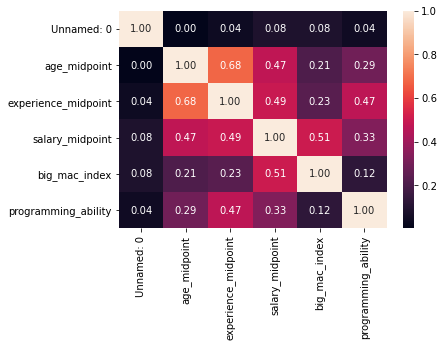

In [153]:
sns.heatmap(df_2016.corr(), annot=True, fmt=".2f");

array([[<AxesSubplot:title={'center':'Respondent'}>,
        <AxesSubplot:title={'center':'CareerSatisfaction'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>],
       [<AxesSubplot:title={'center':'HoursPerWeek'}>,
        <AxesSubplot:title={'center':'StackOverflowSatisfaction'}>,
        <AxesSubplot:title={'center':'Salary'}>],
       [<AxesSubplot:title={'center':'ExpectedSalary'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

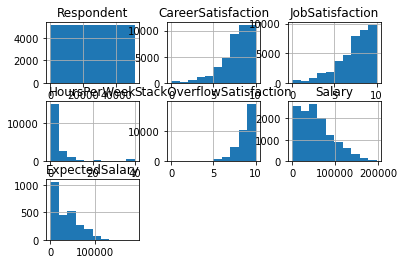

In [5]:
df_2017.hist()

#### We see that salary and experience are correlated; experience and age are highly correlated(>0.5); programming hability is correlated to experience but not highly correlated to salary.

In [155]:
df_2020.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


### Predicting salary: selected year

### 2020

#### Identify categorical variables

In [4]:
#subset to dataframe
cat_df=df_2020.select_dtypes(include=['object'])

In [40]:
cat_df.shape[1]

56

In [41]:
#number of columns with more than 75% of the missing values:
np.sum(np.sum(cat_df.isnull())/cat_df.shape[0]>0.50)

0

In [5]:
#pull list of the column names
cat_list = cat_df.columns

#### references: [stackoverflow](https://github.com/jjrunner/stackoverflow)
#### observation: The following section is based in the use or slightly adaptations of functions developed in the lessons: "Categorical Variables" and "Putting all Together", and applied to a different dataset. 

In [90]:
(df_2020.dtypes).tail(10) #finding quant variables


SurveyEase                 object
SurveyLength               object
Trans                      object
UndergradMajor             object
WebframeDesireNextYear     object
WebframeWorkedWith         object
WelcomeChange              object
WorkWeekHrs               float64
YearsCode                  object
YearsCodePro               object
dtype: object

In [3]:
#Only use quant variables and drop any rows with missing values
num_vars = df_2020[['ConvertedComp','Age','WorkWeekHrs']]

#Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=['ConvertedComp'], axis=0)

# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = fill_df[['ConvertedComp','Age','WorkWeekHrs']]
y = fill_df['ConvertedComp']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 1.0 on 10427 values.'

In [6]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables to dummy
    cat_cols - list of strings associated with names of categorical column
    dummy_na - bool holding when dummy NA values of categorical columns
    OUTPUT:
    df - new dataframe that:
                1 - contains all columns specified as categorical
                2 - remove original columns in cat_cols
                3 - dummy columns for each categorical columns
                4 - if dummy_na ->true, also contains dummy columns for NAN
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [7]:
#droping missing values
df=df_2020.dropna(subset=['ConvertedComp'], axis=0)

In [8]:
#pull list of the column names of categorical variables
cat_df=df.select_dtypes(include=['object'])
cat_cols_lst=cat_df.columns

In [9]:
df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False) 

In [10]:
#Show header:
print(df_new.shape)

(34756, 57692)


In [11]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    '''
    #Drop rows with missing values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test



In [12]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 


In [ ]:
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'ConvertedComp', cat_cols_lst, dummy_na=False)

In [ ]:
Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

## 5 - Evaluating the results. 

  ### Question 1 - Top 5 languages that people have worked in the past year (per year):

|  | 2016| 2017| 2018 | 2019 | 2020 | 2021|
|--| --- | ----|------|------|------|-----|
|1º| Java|  Java| C| C | C| C|
|2º| C|   JavaScript| Java| Java| Java| Java|
|3º|JavaScript|  C| JavaScript | JavaScript|JavaScript|JavaScript|
|4º|PHP|SQL| HTML |CSS| CSS|CSS|
|5º| SQL| Python| CSS |HTML |HTML|HTML|

### Question 2 - Top 5 languages people want to learn: 

|  | 2016| 2017| 2018 | 2019 | 2020 | 2021|
|--| --- | ----|-------|------|-----|------|
|1º| C|  Java| C| C | C| C|
|2º| Java| C| Java| Java| Java| Java|
|3º|R|  C| JavaScript | JavaScript|Python|JavaScript|
|4º|JavaScript|Python| Python |Python| JavaScript|Python|
|5º| Python| SQL| HTML |CSS |CSS|CSS|

### Question 3 - The more programming languages the higher the salary?

#### No, but people who report higher salaries code one of the top 5 worked languages.